In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Load Auto MPG Dataset for Polynomial Regression
auto_df = pd.read_csv("auto-mpg.csv")
print("Polynomial Regression on Auto MPG Dataset")


Polynomial Regression on Auto MPG Dataset


In [6]:
# Drop rows with missing values in the Auto MPG dataset
auto_df['horsepower'] = auto_df['horsepower'].replace('?', np.nan).astype(float)
auto_df.dropna(inplace=True) #Drop rows with NaN values

X = auto_df[['horsepower']]  # Using 'horsepower' as the feature
y = auto_df['mpg']  # Target variable


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform features to polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [10]:
# Create and train the Polynomial Regression model
PR_model = LinearRegression()
PR_model.fit(X_train_poly, y_train)

# Make predictions
y_pred = PR_model.predict(X_test_poly)

In [12]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 18.4170
R^2 Score: 0.6392


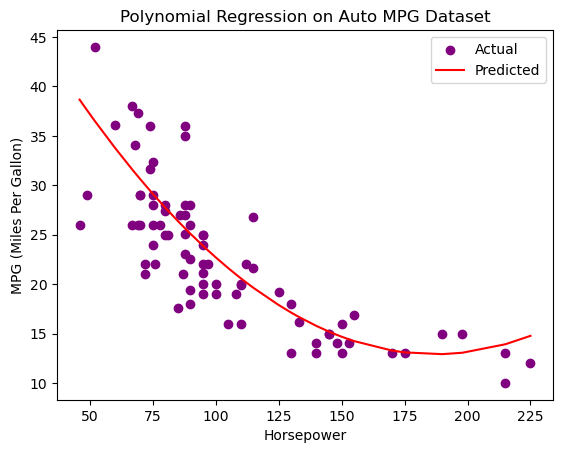

In [14]:
# Plot the results
plt.scatter(X_test, y_test, color='purple', label='Actual')
sorted_indices = X_test.squeeze().argsort()
plt.plot(X_test.iloc[sorted_indices], y_pred[sorted_indices], color='red', label='Predicted')
plt.xlabel('Horsepower')
plt.ylabel('MPG (Miles Per Gallon)')
plt.title('Polynomial Regression on Auto MPG Dataset')
plt.legend()
plt.show()